# Machine Learning, January 2022 Assignment Task

### Leyu Gao

### 6st Febrary 2022 

# Preface 

### After reading the task requirements,  I summarized three questions to be solved:


### 1.Build a model to predict predict the Scent Quality Score 

### 2.To find if any scent chemicals have similar response from customers(the only response provided is score)

### 3.Build a model to group the data

### Based on the three questions, I made the following exploration.

## 1.  Observe and Clean the data-set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Score_data = pd.read_csv("Perfume Score .csv")
Preference_data = pd.read_csv("Perfume preference .csv")

In [3]:
Score_data[0:5]

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver,Scent Quality Score
0,489.766,343.510,638.519,315.377,966.417,913.256,1015.036,479.027,485.797,2918.050062,108.538,727.438,936.842,4801.306119,261.952,148.593,783.264,809.541,1.302700e+07
1,472.841,218.288,642.332,210.582,995.068,989.447,958.614,507.113,242.015,2119.074840,246.654,755.477,840.936,4896.315590,149.498,44.490,906.204,815.512,1.159073e+07
2,472.620,323.480,696.770,288.379,1006.334,875.163,987.398,611.463,410.451,2679.139347,281.022,729.155,825.386,5350.521973,177.980,141.612,705.294,794.394,1.367693e+07
3,503.155,397.632,644.533,151.414,960.097,905.462,1031.227,469.357,388.405,1784.035393,280.953,711.906,786.198,5029.939322,29.515,149.231,678.681,837.614,7.997427e+06
4,499.780,344.096,643.764,353.518,1033.988,978.976,871.312,439.266,311.002,3236.214279,272.058,737.003,898.238,4988.788504,138.884,122.238,622.090,824.174,1.113290e+07


In [4]:
Preference_data[0:10]

,Customer No.,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
0,C_0000001,1353.0,1252.0,4066.0,3838.0,2144.0,4404.0,32082,3866.0,2505.0,3972.0,4485.0,6441,4106.0,1722.0,4287.0,4820.0,4140.0,1463.0
1,C_0000002,1089.0,2152.0,4045.0,3710.0,2235.0,4352.0,30398,4769.0,2995.0,4720.0,4532.0,10931,3794.0,1638.0,4648.0,4472.0,4184.0,1071.0
2,C_0000003,4177.0,3592.0,3596.0,1745.0,3234.0,2116.0,21678,4864.0,3178.0,3381.0,1376.0,18153,2502.0,1733.0,1747.0,2728.0,4580.0,4742.0
3,C_0000004,4899.0,3738.0,2454.0,3976.0,4945.0,3853.0,17963,3040.0,2943.0,2870.0,4016.0,18819,1990.0,5118.0,2391.0,2012.0,3470.0,3057.0
4,C_0000005,4822.0,4030.0,3447.0,4225.0,4078.0,3772.0,23988,3389.0,2415.0,2695.0,3887.0,20367,2118.0,4530.0,2427.0,3205.0,4319.0,2289.0
5,C_0000006,2251.0,2305.0,4058.0,3330.0,1775.0,4882.0,16567,5148.0,4443.0,2472.0,2615.0,11655,3061.0,1549.0,1563.0,1709.0,3426.0,3003.0
6,C_0000007,1661.0,2199.0,4994.0,2795.0,2231.0,4108.0,31511,3584.0,2771.0,4153.0,4462.0,11061,3791.0,2123.0,4528.0,4716.0,4124.0,2016.0
7,C_0000008,4690.0,3674.0,3827.0,2130.0,3483.0,2544.0,21010,4284.0,2457.0,3610.0,1819.0,18601,3917.0,2129.0,1609.0,2614.0,3879.0,3962.0
8,C_0000009,4735.0,3236.0,3255.0,3349.0,4221.0,4038.0,22356,3202.0,2804.0,2754.0,2968.0,16407,1899.0,4813.0,2878.0,2862.0,3125.0,2692.0
9,C_0000010,1259.0,2679.0,3541.0,3159.0,1937.0,4619.0,31967,4662.0,2797.0,3840.0,5327.0,13610,3317.0,1889.0,4457.0,4795.0,4390.0,1690.0


In [5]:
Score_data.isnull().sum().sum()

0

In [6]:
Preference_data.isnull().sum()

Customer No.            0
Narcissus               3
Agrumen                 4
Oud                     8
Jasmine                 2
Amber                   3
Neroli                  5
Indole                  0
Vanilla                 3
Frankincense            6
Bergamot                7
Galbanum                8
Magnolia                0
Sandalwood              5
Cashmeran               5
Citron                 10
Opopanax                8
Aliphatic Aldehydes     5
Vetiver                10
dtype: int64

In [7]:
Preference_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer No.         9497 non-null   object 
 1   Narcissus            9494 non-null   float64
 2   Agrumen              9493 non-null   float64
 3   Oud                  9489 non-null   float64
 4   Jasmine              9495 non-null   float64
 5   Amber                9494 non-null   float64
 6   Neroli               9492 non-null   float64
 7   Indole               9497 non-null   object 
 8   Vanilla              9494 non-null   float64
 9   Frankincense         9491 non-null   float64
 10  Bergamot             9490 non-null   float64
 11  Galbanum             9489 non-null   float64
 12  Magnolia             9497 non-null   object 
 13  Sandalwood           9492 non-null   float64
 14  Cashmeran            9492 non-null   float64
 15  Citron               9487 non-null   f

<AxesSubplot:>

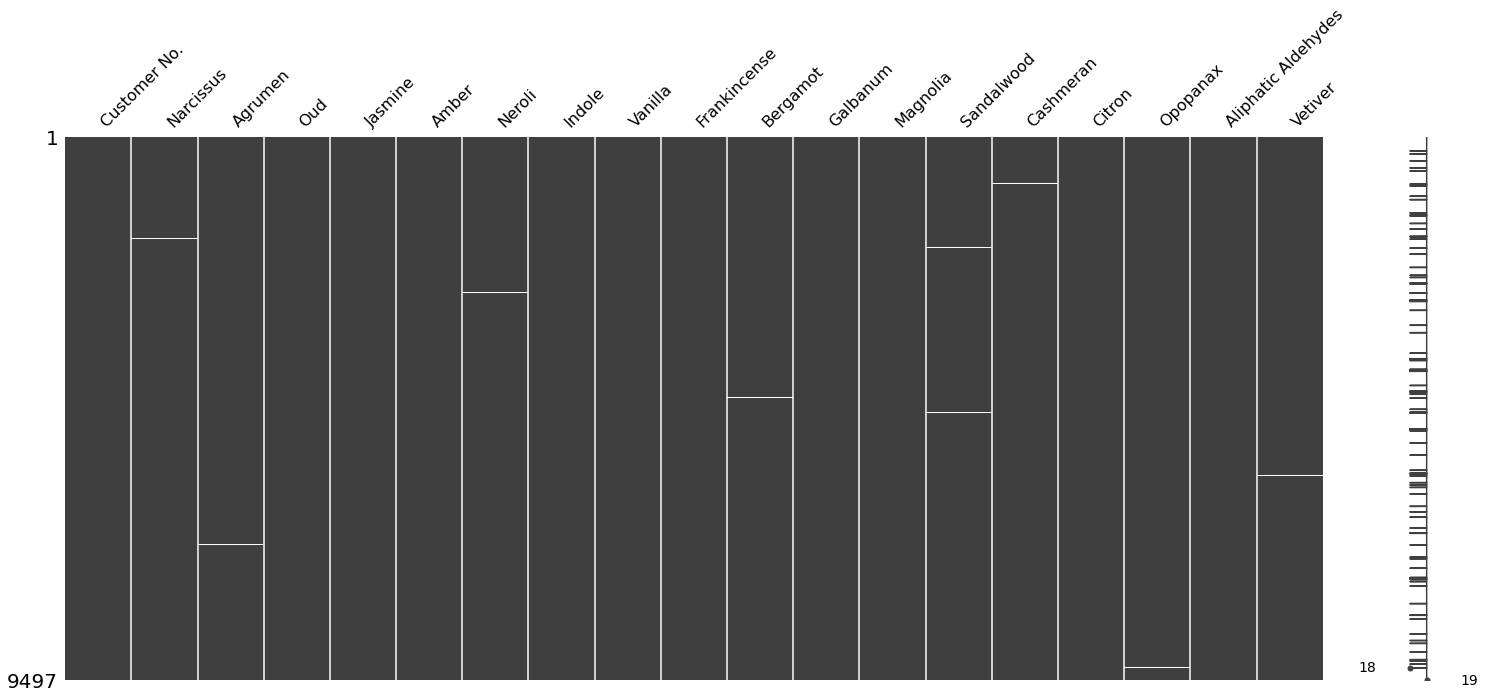

In [8]:
import missingno as msno
msno.matrix(Preference_data)

<AxesSubplot:>

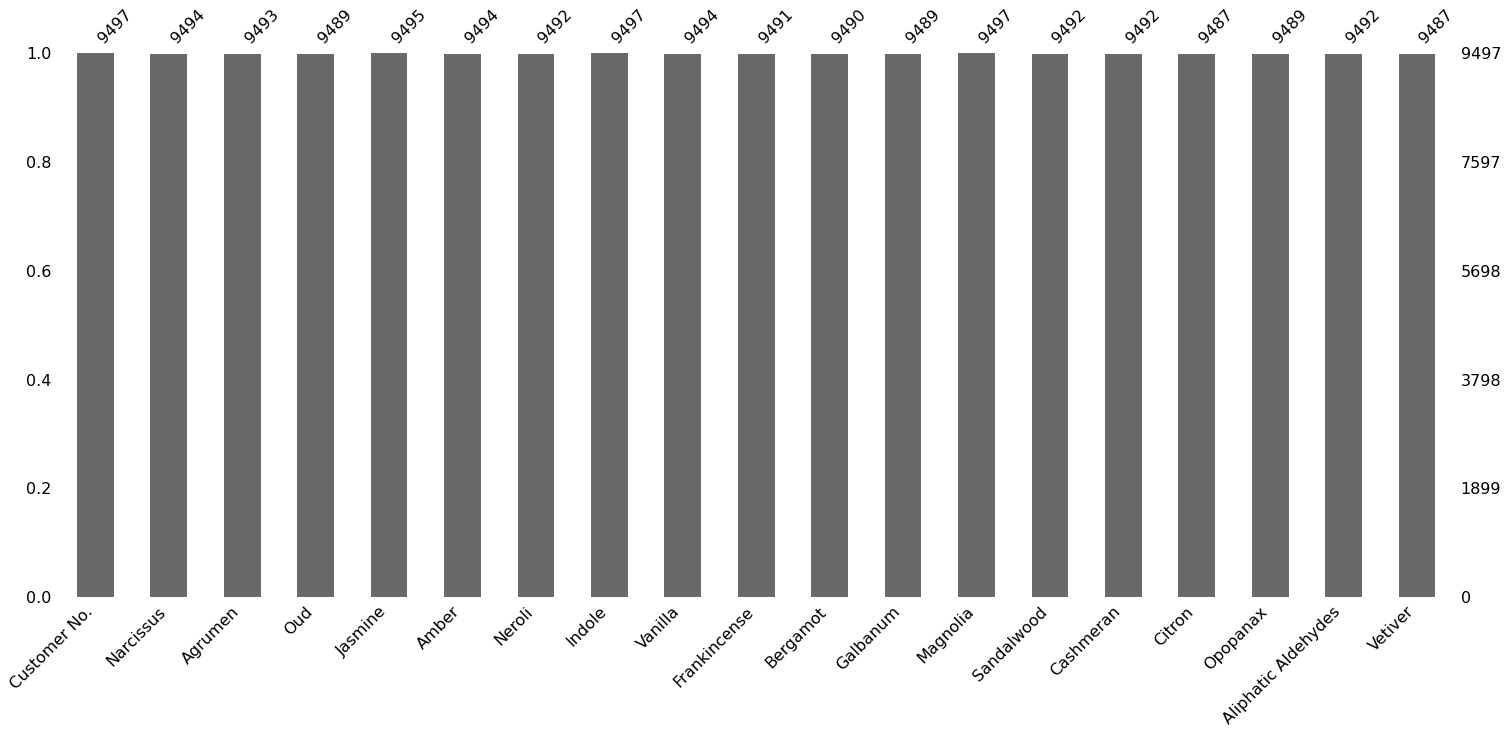

In [9]:
msno.bar(Preference_data)

In [10]:
#change = pd.get_dummies(Preference_data['Customer No.'])
#Preference_data.drop('Customer No.', axis = 1, inplace = True)
#Preference_data = change.join(Preference_data)

In [11]:
Preference_data.replace("#VALUE!", "0", inplace = True)
Preference_data['Indole'] = Preference_data['Indole'].astype('float')
Preference_data['Magnolia'] = Preference_data['Magnolia'].astype('float')

In [12]:
for column_name in Preference_data:     # 3. replace nan with mean number 
    if column_name == 'Customer No.':
        continue
    Preference_data[column_name].fillna(Preference_data[column_name].mean(), inplace = True)

In [13]:
Preference_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer No.         9497 non-null   object 
 1   Narcissus            9497 non-null   float64
 2   Agrumen              9497 non-null   float64
 3   Oud                  9497 non-null   float64
 4   Jasmine              9497 non-null   float64
 5   Amber                9497 non-null   float64
 6   Neroli               9497 non-null   float64
 7   Indole               9497 non-null   float64
 8   Vanilla              9497 non-null   float64
 9   Frankincense         9497 non-null   float64
 10  Bergamot             9497 non-null   float64
 11  Galbanum             9497 non-null   float64
 12  Magnolia             9497 non-null   float64
 13  Sandalwood           9497 non-null   float64
 14  Cashmeran            9497 non-null   float64
 15  Citron               9497 non-null   f

In [42]:
Preference_data.describe()

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,3265.382663,3121.755083,3763.242597,3106.079726,3005.079524,3821.780341,22717.530273,4312.222878,3113.745970,3426.057113,3139.691538,15802.067916,3217.781184,2446.029709,2479.632023,2947.475182,4202.323957,3008.485190
std,1390.185415,924.677336,552.703701,686.295198,991.817371,1059.214805,5272.173858,861.173049,661.136409,740.553332,1223.181744,4635.413252,784.966899,1342.497301,1190.376272,1046.250991,408.918266,1218.977044
min,515.000000,584.000000,1998.000000,1373.000000,946.000000,642.000000,0.000000,1685.000000,1239.000000,1703.000000,551.000000,0.000000,1237.000000,58.000000,30.000000,1057.000000,2256.000000,283.000000
25%,1962.000000,2334.000000,3384.000000,2539.000000,2119.000000,3177.000000,18741.000000,3645.000000,2628.000000,2728.000000,2073.000000,11872.000000,2546.000000,1582.000000,1620.000000,2149.000000,3936.000000,2093.000000
50%,2912.000000,3370.000000,3779.000000,3201.000000,2941.000000,4193.000000,20906.000000,4573.000000,2908.000000,3525.000000,3003.000000,17049.000000,3515.000000,1860.000000,2071.000000,2582.000000,4214.000000,2875.000000
75%,4598.000000,3913.000000,4141.000000,3616.000000,3764.000000,4569.000000,28084.000000,4953.000000,3715.000000,4036.000000,4293.000000,19763.000000,3773.000000,2765.000000,3963.000000,4030.000000,4486.000000,3858.000000
max,5761.000000,5119.000000,5811.000000,4936.000000,5798.000000,5826.000000,35793.000000,6136.000000,4814.000000,5267.000000,5998.000000,25873.000000,4879.000000,6348.000000,5061.000000,5562.000000,5547.000000,6072.000000


# 2. Build model to predict the Scent Quality Score 

In [14]:
from pandas.plotting import scatter_matrix
import seaborn as sns

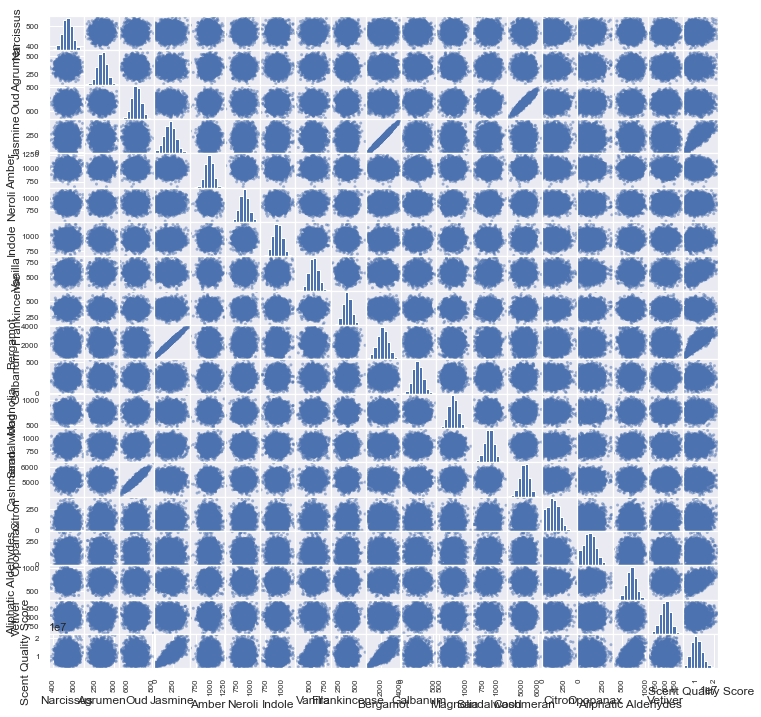

In [17]:
scatter_matrix(Score_data,figsize=(12,12));

(19.5, -0.5)

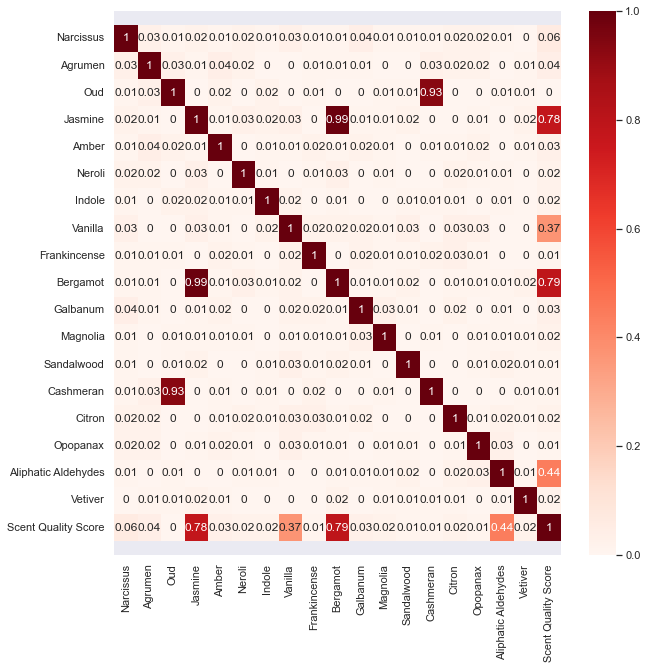

In [16]:
correlation_matrix = np.absolute(Score_data.corr().round(2))
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## 2.1 Linear regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X = pd.DataFrame(np.c_[Score_data['Jasmine'], Score_data['Vanilla'], Score_data['Bergamot'], Score_data['Aliphatic Aldehydes']], columns = ['Jasmine','Vanilla','Bergamot','Aliphatic Aldehydes'])
Y = Score_data['Scent Quality Score'].astype('int')
X

,Jasmine,Vanilla,Bergamot,Aliphatic Aldehydes
0,315.377,479.027,2918.050062,783.264
1,210.582,507.113,2119.074840,906.204
2,288.379,611.463,2679.139347,705.294
3,151.414,469.357,1784.035393,678.681
4,353.518,439.266,3236.214279,622.090
...,...,...,...,...
4999,220.188,600.726,2209.955448,662.834
5000,268.901,583.384,2453.815268,819.217
5001,204.422,539.192,2007.515839,741.248
5002,147.307,510.981,1762.999938,804.591


In [22]:
from sklearn.model_selection import train_test_split
logModel = LogisticRegression(solver = 'liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
logModel = logModel.fit(X_train, Y_train)
predictions = logModel.predict(X_test)
predictions

array([ 9564840, 19710615,  9564840, ...,  9564840, 17847255, 12509126])

In [23]:
logModel.score(X_train, Y_train)

0.16462653010242317

In [24]:
lin_Model = LinearRegression()
lin_Model.fit(X_train,Y_train)
pre = lin_Model.predict(X_test)
pre

array([ 8514530.37985041, 15123587.82763198,  8443207.30532952, ...,
        9536194.90795539, 11251129.90878445, 11546394.08468677])

In [39]:
lin_Model.score(X_test,Y_test)

0.9702687131743002

In [38]:
Y_train_predicted = lin_Model.predict(X_train)
Y_test_predicted= lin_Model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_predicted))
r2_train = r2_score(Y_train,Y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_predicted))
r2_test = r2_score(Y_test,Y_test_predicted)
print("R2: ")
print("Train = :", r2_train)
print("Test = :", r2_test)
print("RMSE: ")
print("Train = :", rmse_train)
print("Test = :", rmse_test)

R2: 
Train = : 0.9715564262629722
Test = : 0.9702687131743002
RMSE: 
Train = : 481508.1157257191
Test = : 502653.31535547005


## 2.2 Polynomial regression 

In [26]:
poly_features = PolynomialFeatures(degree=3)  # degree = 3 is optimal
X_train_poly = poly_features.fit_transform(X_train)
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly,Y_train)

LinearRegression()

In [32]:
X_test_poly = poly_features.fit_transform(X_test)

In [33]:
polynomial_model.score(X_test_poly,Y_test)

0.9962219436473585

In [41]:
Y_train_predicted = polynomial_model.predict(X_train_poly)
Y_test_predicted= polynomial_model.predict(X_test_poly)
rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_predicted))
r2_train = r2_score(Y_train,Y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_predicted))
r2_test = r2_score(Y_test,Y_test_predicted)
print("R2: ")
print("Train = :", r2_train)
print("Test = :", r2_test)
print("RMSE: ")
print("Train = :", rmse_train)
print("Test = :", rmse_test)

R2: 
Train = : 0.9962143677426408
Test = : 0.9962219436473585
RMSE: 
Train = : 175663.18082398665
Test = : 179182.6328881805


# 3. Build Kmeans model to group data

In [43]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [47]:
Preference_data.drop(['Customer No.'],axis = 1,inplace=True)

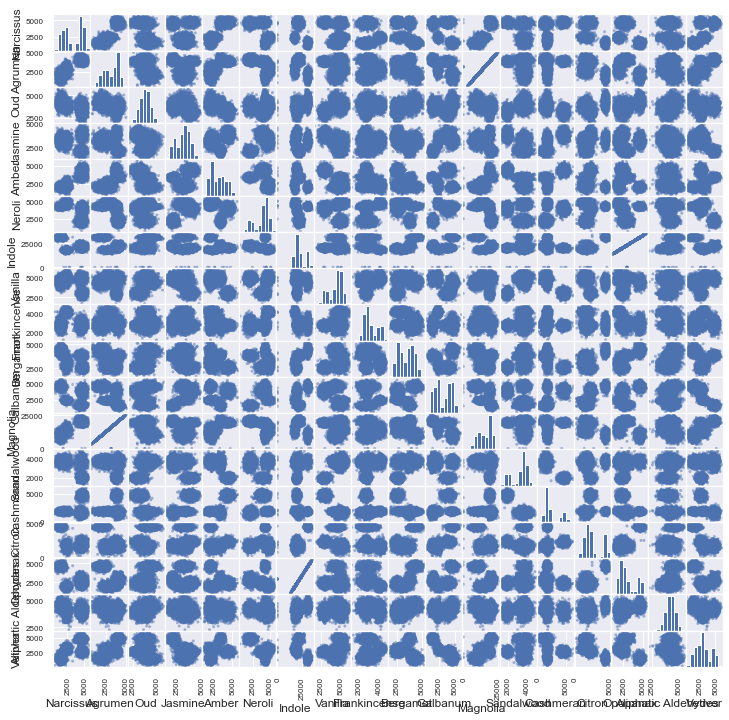

In [48]:
from pandas.plotting import scatter_matrix
scatter_matrix(Preference_data, figsize=(12,12));

In [63]:
standardized_Preference_data = preprocessing.scale(Preference_data)
standardized_Preference_data_df = pd.DataFrame(standardized_Preference_data, columns = Preference_data.columns)

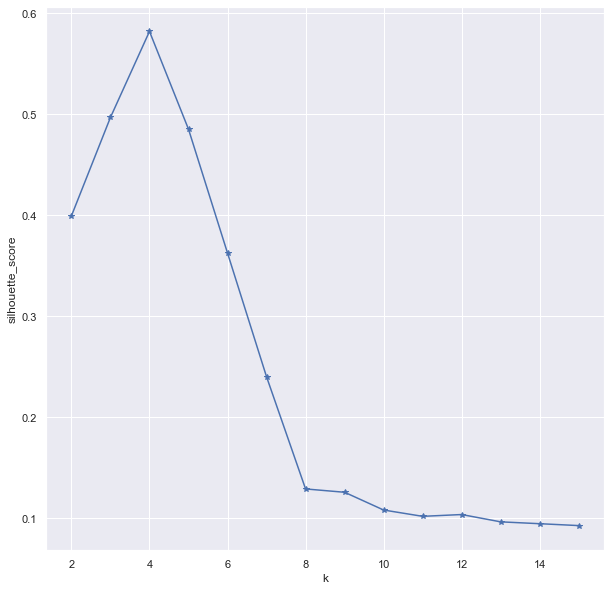

In [64]:
from sklearn import metrics
def k_silhouette(X, clusters):
    K = range(2, clusters + 1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        labels = kmeans.labels_
        S.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))
    
    plt.plot(K,S,'b*-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    plt.show()

k_silhouette(standardized_Preference_data_df, 15)
# 4 is the best number of K 

In [65]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(standardized_Preference_data_df)

KMeans(n_clusters=4)

In [66]:
y_km = kmeans.fit_predict(standardized_Preference_data_df)

In [67]:
print(y_km[0:30])

[2 2 3 1 1 0 2 3 1 2 3 2 2 2 3 1 0 0 1 2 3 0 3 3 0 3 0 1 0 3]


In [68]:
standard_centers = kmeans.cluster_centers_
standard_centers

array([[-0.63508675, -0.41641312,  0.1801924 ,  0.10214018, -0.71073531,
         0.92559669, -0.90918885,  0.69966415,  1.49956699, -0.59666119,
        -0.60720389, -0.41414534,  0.57117372, -0.48341316, -0.74077772,
        -0.91436421, -0.42815036,  0.10413989],
       [ 1.01512708,  0.75401605, -1.09476607,  1.04776978,  1.37499078,
         0.14680867, -0.54018956, -1.52078422, -0.61896137, -1.13774394,
         0.62329158,  0.75237149, -1.61128735,  1.66687438, -0.18799296,
        -0.54276709, -0.53338134, -0.30061661],
       [-1.2345529 , -1.27841445,  0.84571864,  0.21695373, -1.00251791,
         0.4677676 ,  1.55303636,  0.12346678, -0.43796367,  1.19821614,
         1.18028798, -1.27663712,  0.56702368, -0.50325856,  1.59486712,
         1.56359936,  0.82022759, -1.19924176],
       [ 0.90638695,  0.99381461,  0.04883221, -1.40107939,  0.37454187,
        -1.59030928, -0.13556622,  0.70373206, -0.45305188,  0.52350583,
        -1.24439817,  0.99130466,  0.46500412, -0.678

In [102]:
Preference_data[y_km == 1].describe()

,Narcissus,Agrumen,Oud,Jasmine,Amber,Neroli,Indole,Vanilla,Frankincense,Bergamot,Galbanum,Magnolia,Sandalwood,Cashmeran,Citron,Opopanax,Aliphatic Aldehydes,Vetiver
count,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000,2368.000000
mean,4676.523226,3818.939930,3158.193195,3825.121233,4368.747466,3977.274071,19869.706926,3002.633446,2704.549617,2583.541409,3902.050285,19289.437078,1953.040541,4683.686246,2255.861443,2379.634470,3984.226066,2642.059736
std,322.755997,245.804939,365.915794,337.839483,369.074874,428.063916,1723.066835,311.890119,215.473699,241.430960,451.327033,1289.891950,206.879634,427.602786,294.111868,315.056847,339.352847,351.319935
min,3687.000000,3077.000000,1998.000000,2549.000000,3160.000000,2314.000000,0.000000,1685.000000,1926.000000,1703.000000,2361.000000,0.000000,1237.000000,2446.029709,1294.000000,1460.000000,2847.000000,1393.000000
25%,4456.750000,3654.750000,2907.000000,3588.000000,4115.750000,3701.000000,18804.750000,2784.000000,2557.000000,2420.750000,3596.000000,18484.000000,1817.000000,4397.750000,2053.500000,2161.000000,3754.000000,2415.750000
50%,4675.500000,3821.000000,3166.000000,3823.000000,4362.500000,3974.000000,19895.000000,3010.000000,2704.000000,2584.000000,3900.500000,19317.000000,1952.000000,4672.000000,2261.500000,2382.000000,3990.000000,2633.500000
75%,4886.000000,3990.000000,3406.250000,4057.000000,4622.250000,4254.000000,20985.500000,3214.000000,2847.250000,2744.000000,4209.250000,20140.500000,2091.000000,4965.500000,2455.000000,2598.250000,4211.000000,2881.250000
max,5683.000000,4633.000000,4533.000000,4936.000000,5798.000000,5211.000000,24821.000000,4065.000000,3427.000000,3426.057113,5611.000000,23275.000000,2628.000000,6348.000000,3310.000000,3360.000000,5273.000000,3803.000000


In [97]:
std = np.array(Preference_data.std())
print("std: ",std)
mean = np.array(Preference_data.mean())
print("mean: ",mean)

std:  [1390.1854147   924.6773364   552.70370106  686.29519773  991.81737059
 1059.21480477 5272.17385835  861.17304921  661.13640936  740.55333167
 1223.18174363 4635.41325245  784.96689884 1342.49730105 1190.37627245
 1046.25099067  408.91826611 1218.97704429]
mean:  [ 3265.38266273  3121.75508269  3763.24259669  3106.07972617
  3005.07952391  3821.78034134 22717.53027272  4312.22287761
  3113.74596987  3426.05711275  3139.69153757 15802.06791618
  3217.78118416  2446.02970923  2479.63202277  2947.47518179
  4202.32395702  3008.48519026]


In [98]:
# standard_data = (standard_data - mean)/std
centers1 = standard_centers[0] * std + mean
centers1

array([ 2382.49433048,  2736.70730493,  3862.83560506,  3176.17804102,
        2300.159902  ,  4802.18606068, 17924.1286017 ,  4914.75478378,
        4105.16430671,  2984.19767984,  2396.97082545, 13882.33312625,
        3666.13364848,  1797.04885285,  1597.82779636,  1990.82072455,
        4027.24545441,  3135.42932645])

In [100]:
kmeans_ori = KMeans(n_clusters = 4)
kmeans_ori.fit(Preference_data)
centers = kmeans_ori.cluster_centers_
centers

array([[ 2387.63392804,  2732.08725539,  3861.51711155,  3177.449811  ,
         2304.28856763,  4799.43753899, 17884.5401092 ,  4910.9102154 ,
         4101.32402013,  2984.53052135,  2399.972151  , 13852.56110878,
         3662.71086198,  1801.68714369,  1600.3876086 ,  1992.44384773,
         4027.32072571,  3135.16271565],
       [ 4675.65961945,  3819.45919662,  3158.33466604,  3824.59707388,
         4367.74799154,  3976.84608879, 19893.72135307,  3003.66511628,
         2705.09830526,  2583.63934762,  3901.72053895, 19298.71162791,
         1953.4858351 ,  4682.41861721,  2255.94456493,  2378.68245243,
         3984.6132448 ,  2642.21879728],
       [ 1550.52842867,  1940.56139713,  4230.48513627,  3254.58649597,
         2011.51220781,  4316.41005393, 30915.0321915 ,  4418.79364424,
         2824.406416  ,  4313.31208062,  4582.14270167,  9882.43747421,
         3662.62929475,  1770.68428795,  4376.69387703,  4583.44160132,
         4537.46306232,  1548.32602987],
       [ 4515

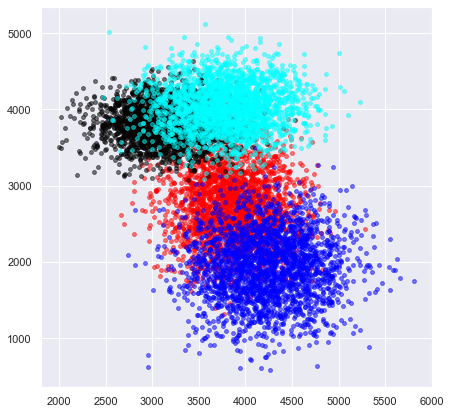

In [105]:
plt.figure(figsize = (7,7))
plt.scatter(Preference_data[y_km == 0]['Oud'], Preference_data[y_km == 0]['Agrumen'],
           s = 15, c = 'red', alpha = 0.5)
plt.scatter(Preference_data[y_km == 1]['Oud'], Preference_data[y_km == 1]['Agrumen'],
           s = 15, c = 'black', alpha = 0.5)
plt.scatter(Preference_data[y_km == 2]['Oud'], Preference_data[y_km == 2]['Agrumen'],
           s = 15, c = 'blue', alpha = 0.5)
plt.scatter(Preference_data[y_km == 3]['Oud'], Preference_data[y_km == 3]['Agrumen'],
           s = 15, c = 'cyan', alpha = 0.5)

In [106]:
from mpl_toolkits.mplot3d import Axes3D

In [107]:
%matplotlib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(20,20)
ax.set_xlabel('Narcissus')
ax.set_ylabel('Agrumen')
ax.set_ylabel('Oud')
ax.scatter(Preference_data[y_km == 0]['Narcissus'], Preference_data[y_km == 0]['Agrumen'],Preference_data[y_km == 0]['Oud'],
           s = 15, c = 'red', alpha = 0.3)
ax.scatter(Preference_data[y_km == 1]['Narcissus'], Preference_data[y_km == 1]['Agrumen'],Preference_data[y_km == 1]['Oud'],
           s = 15, c = 'black', alpha = 0.3)
ax.scatter(Preference_data[y_km == 2]['Narcissus'], Preference_data[y_km == 2]['Agrumen'],Preference_data[y_km == 2]['Oud'],
           s = 15, c = 'blue', alpha = 0.3)
ax.scatter(Preference_data[y_km == 3]['Narcissus'], Preference_data[y_km == 3]['Agrumen'],Preference_data[y_km == 3]['Oud'],
           s = 15, c = 'cyan', alpha = 0.3)

Using matplotlib backend: Qt5Agg


In [109]:
kmeans.inertia_

30865.25437171896

# Conclusions and insight about the data